In [ ]:
# conda install python=3.8
# pip install ultralytics
# pip install torch torchaudio --index-url https://download.pytorch.org/whl/cu118
# pip install torchvision --index-url https://download.pytorch.org/whl/cu118


In [1]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
import easyocr
import numpy as np

In [3]:
# Load a COCO-pretrained YOLOv8n model
testmodel = YOLO("yolov8n.pt")

# Display model information (optional)
testmodel.info()

testmodel = testmodel.train(data="data.yaml", epochs=30, imgsz=512)

YOLOv8n summary: 225 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs
Ultralytics 8.3.50  Python-3.8.20 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2080, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train16, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_c

train: Scanning C:\Users\Claudio\Documents\VehicularSystems\svs-project\datasets\dataset\train\labels.cache... 5368 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5368/5368 [00:00<?, ?it/s]
val: Scanning C:\Users\Claudio\Documents\VehicularSystems\svs-project\datasets\dataset\val\labels.cache... 823 images, 1 backgrounds, 0 corrupt: 100%|██████████| 824/824 [00:00<?, ?it/s]


Plotting labels to runs\detect\train16\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to runs\detect\train16
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.37G      1.839      4.897      1.488         35        512:   5%|▌         | 18/336 [00:14<04:19,  1.22it/s]


KeyboardInterrupt: 

In [2]:
model = YOLO("yolo_pytorch/best.pt")

reader = easyocr.Reader(["en"], gpu=True)
#metrics = model.val()

In [26]:
metrics05 = model.val(data="test_data.yaml", split="test", plots=True, conf=0.5)
metrics = model.val(data="test_data.yaml", split="test", plots=True)

Ultralytics 8.3.51  Python-3.8.20 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2080, 8192MiB)


val: Scanning C:\Users\Claudio\Documents\VehicularSystems\svs-project\datasets\dataset\test\labels.cache... 2065 images, 2065 backgrounds, 0 corrupt: 100%|██████████| 4130/4130 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 259/259 [00:15<00:00, 16.53it/s]


                   all       4130       2843       0.47      0.664      0.409      0.283
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\detect\val11
Ultralytics 8.3.51  Python-3.8.20 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2080, 8192MiB)


val: Scanning C:\Users\Claudio\Documents\VehicularSystems\svs-project\datasets\dataset\test\labels.cache... 2065 images, 2065 backgrounds, 0 corrupt: 100%|██████████| 4130/4130 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 259/259 [00:16<00:00, 15.30it/s]


                   all       4130       2843      0.458      0.697        0.4      0.249
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\detect\val12


In [28]:
metrics_60 = model.val(data="test_data.yaml", split="test", plots=True, conf=0.6)

Ultralytics 8.3.51  Python-3.8.20 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2080, 8192MiB)


val: Scanning C:\Users\Claudio\Documents\VehicularSystems\svs-project\datasets\dataset\test\labels.cache... 2065 images, 2065 backgrounds, 0 corrupt: 100%|██████████| 4130/4130 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 259/259 [00:15<00:00, 17.03it/s]


                   all       4130       2843      0.486      0.551      0.385      0.272
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\detect\val13


In [32]:
metrics_40 = model.val(data="test_data.yaml", split="test", plots=True, conf=0.3)

Ultralytics 8.3.51  Python-3.8.20 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2080, 8192MiB)


val: Scanning C:\Users\Claudio\Documents\VehicularSystems\svs-project\datasets\dataset\test\labels.cache... 2065 images, 2065 backgrounds, 0 corrupt: 100%|██████████| 4130/4130 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 259/259 [00:16<00:00, 15.75it/s]


                   all       4130       2843      0.458      0.697      0.422      0.284
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\detect\val15


In [36]:
metrics_70 = model.predict(data="test_data.yaml", split="test", plots=True, conf=0.4)
print(f"Precision with 0.7 confidence: " +  str(metrics_70.box.p))
print(f"Recall: with 0.7 confidence" +  str(metrics_70.box.r))


WARNING  'source' is missing. Using 'source=D:\Users\Claudio\anaconda3\envs\carla-test-ocr\Lib\site-packages\ultralytics\assets'.

image 1/2 D:\Users\Claudio\anaconda3\envs\carla-test-ocr\Lib\site-packages\ultralytics\assets\bus.jpg: 512x384 (no detections), 399.5ms
image 2/2 D:\Users\Claudio\anaconda3\envs\carla-test-ocr\Lib\site-packages\ultralytics\assets\zidane.jpg: 288x512 (no detections), 45.2ms
Speed: 1.5ms preprocess, 222.4ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 512)


AttributeError: 'list' object has no attribute 'box'

In [34]:
# Access specific metrics
print(f"Precision with default confidence: " +  str(metrics.box.p))
print(f"Recall: with default confidence" +  str(metrics.box.r))
print(f"Precision with 0.4 confidence: " +  str(metrics_40.box.p))
print(f"Recall: with 0.4 confidence" +  str(metrics_40.box.r))
print(f"Precision with 0.5 confidence: " +  str(metrics05.box.p))
print(f"Recall: with 0.5 confidence" +  str(metrics05.box.r))
print(f"Precision with 0.6 confidence: " +  str(metrics_60.box.p))
print(f"Recall: with 0.6 confidence" +  str(metrics_60.box.r))


Precision with default confidence: [    0.45843]
Recall: with default confidence[     0.6968]
Precision with 0.4 confidence: [    0.45843]
Recall: with 0.4 confidence[     0.6968]
Precision with 0.5 confidence: [    0.46967]
Recall: with 0.5 confidence[    0.66444]
Precision with 0.6 confidence: [    0.48558]
Recall: with 0.6 confidence[    0.55083]



0: 288x512 (no detections), 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 512)


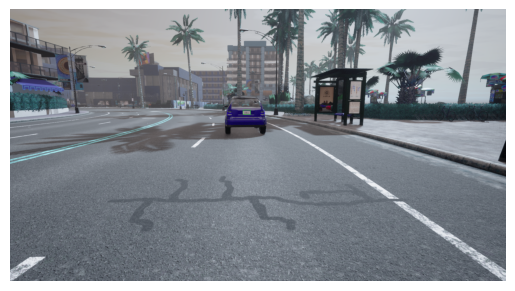

In [7]:
img = cv2.imread("carla_images/image.png")
results = model(img)
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    if boxes:
        for box in boxes:
            plate = img[int(box.xyxy[0][1].item()) : int(box.xyxy[0][3].item()), int(box.xyxy[0][0].item()) : int(box.xyxy[0][2].item())] #(int(boxes.xyxy[0][0].item() * rescaling_factor), int(boxes.xyxy[0][1].item() * rescaling_factor)), (int((boxes.xyxy[0][2].item() * rescaling_factor)), int((boxes.xyxy[0][3].item() * rescaling_factor)))
            plate_reading = reader.readtext(plate)
            plt.imshow(plate)
            
            cv2.rectangle(img, (int(box.xyxy[0][0].item()), int(box.xyxy[0][1].item())), (int((box.xyxy[0][2].item())), int((box.xyxy[0][3].item()))), (255, 0, 0), 2)
            for plate_detected in plate_reading:
                confidence = plate_detected[2]
                plate_text = plate_detected[1]
                if confidence > 0.5:
                    cv2.putText(img, plate_text, (int(box.xyxy[0][0].item()), int(box.xyxy[0][1].item())), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
            #annotated_image = result.plot()
plt.imshow(img)
plt.axis("off")
plt.show()

In [1]:
import torch, torchvision
print(torch.cuda.is_available())
print(torch.version.cuda)
print(torch.backends.cudnn.version())
print(torchvision.__version__)

True
11.8
90100
0.19.1+cu118
